In [2]:
!pip install opencv-contrib-python

!pip install numpy

!pip install matplotlib

!pip install scikit-learn



(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

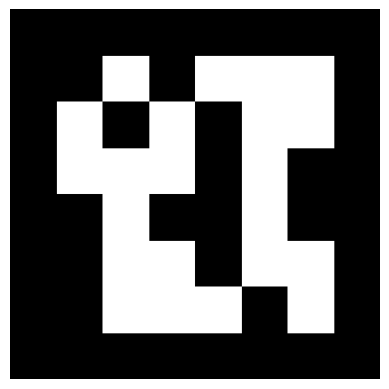

In [3]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt

# 마커 ID와 크기 설정
marker_id = 231
marker_size = 300  # 픽셀

# ArUco 사전 선택 (6x6 마커 250개 사전)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

# 마커 생성
marker_img = aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

# 이미지 저장
plt.imshow(marker_img, cmap='gray')
plt.axis('off') 


In [4]:
#define base ArUco marker characteristics
marker_size = 100  # 마커의 한 변 길이 (픽셀 단위)
marker_type = aruco.DICT_6X6_250  # 마커 유형
aruco_dict = aruco.getPredefinedDictionary(marker_type)  # 마커 사전 생성

# 대표적인 HSV 색상 (중심값 기준)
HSV_COLOR_DICT = {
    "RED":     (0,   255, 255),   # Hue 0도 (또는 170도도 빨강 계열)
    #"ORANGE":  (20,  255, 255),   # Hue 20도
    #"YELLOW":  (40,  255, 255),   # Hue 40도
    "GREEN":   (75,  255, 255),   # Hue 75도
    "BLUE":    (110, 255, 255),   # Hue 110도
    #"PURPLE":  (145, 255, 255),   # Hue 145도
}
def get_hsv_color(color_name):
    """
    주어진 색상 이름에 해당하는 HSV 색상을 반환합니다.
    """
    return HSV_COLOR_DICT.get(color_name.upper(), (0, 0, 0))  # 기본값은 검정색
def hsv_to_bgr(hsv_color):
    """
    HSV 색상을 BGR 색상으로 변환합니다.
    """
    bgr_color = cv2.cvtColor(np.uint8([[hsv_color]]), cv2.COLOR_HSV2BGR)[0][0]
    return tuple(bgr_color)
def bgr_to_hsv(bgr_color):
    """
    BGR 색상을 HSV 색상으로 변환합니다.
    """
    hsv_color = cv2.cvtColor(np.uint8([[bgr_color]]), cv2.COLOR_BGR2HSV)[0][0]
    return tuple(hsv_color)
def detect_hsv_color(hsv_tuple):
    """
    Hue만 기반으로 간단히 색상 이름 판별 (OpenCV Hue 범위: 0–179)
    """
    h = hsv_tuple[0]

    if (h < 10) or (h >= 170):
        return "RED"
    elif 10 <= h < 25:
        return "ORANGE"
    elif 25 <= h < 35:
        return "YELLOW"
    elif 35 <= h < 85:
        return "GREEN"
    elif 85 <= h < 130:
        return "BLUE"
    elif 130 <= h < 170:
        return "PURPLE"
    else:
        return "UNKNOWN"


def create_aruco_marker(marker_id, verbose=True):
    """
    주어진 ID와 길이를 가진 ArUco 마커를 생성합니다.
    """
    # ArUco 마커 생성
    marker_img = aruco.generateImageMarker(aruco_dict, marker_id, marker_size)  # 길이를 픽셀로 변환
    # 이미지 저장
    cv2.imwrite(f"aruco_marker_{marker_id}.png", marker_img)
    print(f"✅ ArUco 마커 ID {marker_id} 저장됨: aruco_marker_{marker_id}.png")
    if verbose:
        plt.imshow(marker_img, cmap='gray')
        plt.axis('off')
        plt.title(f"ArUco Marker {marker_id}")
        plt.show()
    return marker_img

def bg_img_setup(colors, bg_img):
    raise NotImplementedError("bg_img_setup 함수는 구현되지 않았습니다.")

def create_colored_aruco_marker(marker_id, color_names, verbose=True):
    """
    마커 ID와 두 개의 색상 이름을 받아서, 마커를 양쪽 색상 배경 위에 출력합니다.
    """
    assert len(color_names) == 2, "color_names는 정확히 2개의 색상명을 가져야 합니다."

    # 마커 생성
    marker_size = 200
    aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
    marker_img = aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

    # HSV → BGR 색 변환
    bgr_colors = [hsv_to_bgr(get_hsv_color(name)) for name in color_names]

    # 배경 이미지 설정
    border = 50
    total_size = marker_size + 2 * border
    bg_img = np.zeros((total_size, total_size, 3), dtype=np.uint8)

    # 좌/우로 배경 색 나누기
    mid_x = total_size // 2
    bg_img[:, :mid_x] = bgr_colors[0]  # 왼쪽
    bg_img[:, mid_x:] = bgr_colors[1]  # 오른쪽

    # 중앙에 마커 삽입
    bg_img[border:border + marker_size, border:border + marker_size] = cv2.cvtColor(marker_img, cv2.COLOR_GRAY2BGR)

    # 텍스트로 색상 이름 추가
    for i, name in enumerate(color_names):
        pos_x = 10 if i == 0 else mid_x + 10
        cv2.putText(bg_img, name, (pos_x, total_size - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # 저장 및 출력
    filename = f"colored_aruco_marker_{marker_id}_{color_names[0]}_{color_names[1]}.png"
    cv2.imwrite(filename, bg_img)
    print(f"✅ 저장됨: {filename}")

    # 표시
    if verbose:
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Colored ArUco Marker {marker_id} ({color_names[0]}, {color_names[1]})")
        plt.show()
    return bg_img



def create_color_aruco_marker(marker_id, fg_color=(0, 0, 0), bg_color=(255, 255, 255), marker_size=200, verbose=True):
    """
    색상 커스터마이징된 ArUco 마커 생성 (인식은 grayscale 기준으로 가능)
    fg_color: 마커 내부 (원래는 검정)
    bg_color: 마커 배경 (원래는 흰색)
    """
    aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
    marker_bw = aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

    # 컬러 마커 생성
    marker_colored = np.zeros((marker_size, marker_size, 3), dtype=np.uint8)
    marker_colored[:, :] = bg_color
    marker_colored[marker_bw == 0] = fg_color

    filename = f"color_aruco_marker_{marker_id}_{fg_color}_{bg_color}.png"
    save_marker = cv2.cvtColor(marker_colored, cv2.COLOR_BGR2RGB)
    cv2.imwrite(filename, save_marker)
    print(f"✅ 저장됨: {filename}")
    if verbose:
        plt.imshow(marker_colored)
        plt.axis('off')
        plt.title(f"Color ArUco Marker {marker_id} ({fg_color}, {bg_color})")
        plt.show()

    return marker_colored


✅ ArUco 마커 ID 231 저장됨: aruco_marker_231.png


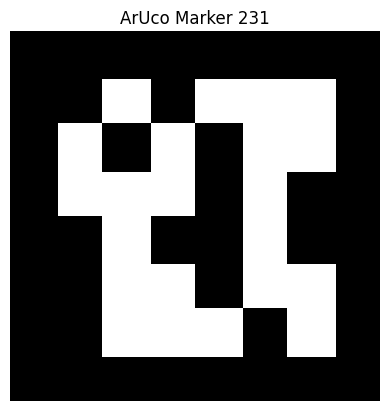

✅ 저장됨: colored_aruco_marker_231_RED_BLUE.png


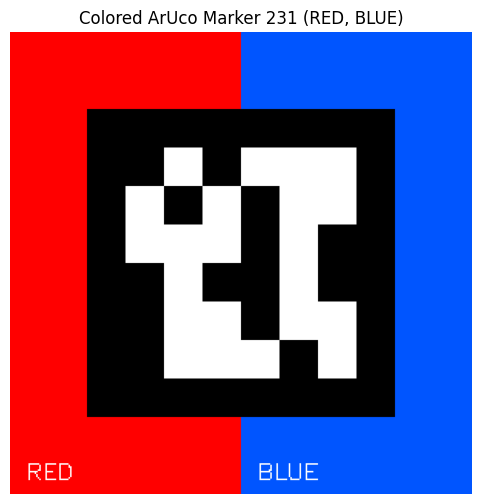

✅ 저장됨: color_aruco_marker_231_(0, 25, 0)_(215, 0, 35).png


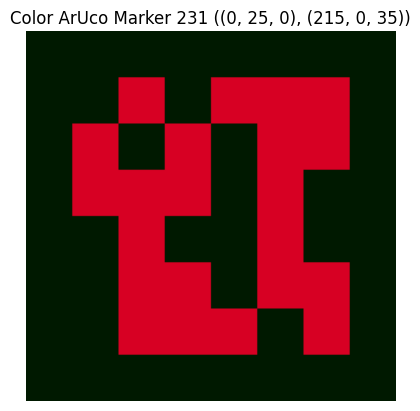

array([[[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]],

       [[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]],

       [[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]],

       ...,

       [[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]],

       [[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]],

       [[ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0],
        ...,
        [ 0, 25,  0],
        [ 0, 25,  0],
        [ 0, 25,  0]]], dtype=uint8)

In [5]:
create_aruco_marker(marker_id)
create_colored_aruco_marker(marker_id, ["RED", "BLUE"])
create_color_aruco_marker(marker_id, (0, 25, 0), (215, 0, 35), marker_size=200)

In [6]:
from sklearn.cluster import KMeans

def get_surrounding_hsv_color(image, pts, size=30):
    """
    Extracts two dominant HSV colors from the area surrounding an ArUco marker.
    Args:
        image: Original BGR image
        pts: 4 corner points of the detected ArUco marker
        size: Padding area around the marker to include in the surrounding region
    Returns:
        Tuple of 2 dominant HSV color tuples
    """
    x, y, w, h = cv2.boundingRect(pts.astype(int))
    x1, y1 = max(x - size, 0), max(y - size, 0)
    x2, y2 = min(x + w + size, image.shape[1]), min(y + h + size, image.shape[0])

    # Extract ROI with surroundings
    surrounding_area = image[y1:y2, x1:x2]
    hsv_area = cv2.cvtColor(surrounding_area, cv2.COLOR_BGR2HSV)

    # Mask the marker area to exclude it
    mask = np.ones(hsv_area.shape[:2], dtype=np.uint8) * 255
    shifted_pts = pts.astype(int) - np.array([x1, y1])
    cv2.fillPoly(mask, [shifted_pts], 0)  # black out the marker

    # Apply mask and reshape
    masked_hsv = hsv_area[mask == 255]
    if masked_hsv.size == 0:
        return ((0, 0, 0), (0, 0, 0))

    # KMeans to find two dominant HSV clusters
    kmeans = KMeans(n_clusters=2, n_init=10)
    try:
        kmeans.fit(masked_hsv)
        colors = kmeans.cluster_centers_
        return tuple(map(tuple, colors.astype(int)))
    except Exception as e:
        print("KMeans failed:", e)
        mean_color = masked_hsv.mean(axis=0).astype(int)
        return (tuple(mean_color), tuple(mean_color))
    
# Detect markers and nearby color
def detect_aruco_with_color(image_path, verbose=True):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    aruco_dict = aruco.getPredefinedDictionary(marker_type)
    parameters = aruco.DetectorParameters()

    parameters.adaptiveThreshWinSizeMin = 3
    parameters.adaptiveThreshWinSizeMax = 23
    parameters.adaptiveThreshWinSizeStep = 10
    parameters.adaptiveThreshConstant = 7

    parameters.minMarkerPerimeterRate = 0.02
    parameters.maxMarkerPerimeterRate = 4.0
    parameters.polygonalApproxAccuracyRate = 0.03

    parameters.minCornerDistanceRate = 0.05
    parameters.minDistanceToBorder = 3
    parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX


    corners, ids, _ = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    results = []

    if ids is not None:
        for i, corner in enumerate(corners):
            id_val = ids[i][0]
            pts = corner[0]

            # Get surrounding HSV
            hsv = get_surrounding_hsv_color(image, pts)
            print(f"Surrounding HSV for ID {id_val}: {hsv}")
            color_name = [detect_hsv_color(hsv[0]), detect_hsv_color(hsv[1])]
            
            results.append((id_val, color_name))

            # Draw marker + color
            cv2.polylines(image, [pts.astype(int)], True, (0, 255, 0), 2)
            x, y = int(pts[0][0]), int(pts[0][1])
            label = f"ID:{id_val} {color_name}"
            cv2.putText(image, label, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        if verbose:
            cv2.imshow("Detected ArUco + Color", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        print(f"Detected {len(ids)} markers.")
        for id_val, color_name in results:
            print(f"Marker ID: {id_val}, Colors: {color_name}")

    else:
        print("No markers detected.")
    
    return results

  
# Detect markers and nearby color
def detect_aruco(image_path, verbose=True):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    aruco_dict = aruco.getPredefinedDictionary(marker_type)
    parameters = aruco.DetectorParameters()

    parameters.adaptiveThreshWinSizeMin = 3
    parameters.adaptiveThreshWinSizeMax = 23
    parameters.adaptiveThreshWinSizeStep = 10
    parameters.adaptiveThreshConstant = 7

    parameters.minMarkerPerimeterRate = 0.02
    parameters.maxMarkerPerimeterRate = 4.0
    parameters.polygonalApproxAccuracyRate = 0.03

    parameters.minCornerDistanceRate = 0.05
    parameters.minDistanceToBorder = 3
    parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX


    corners, ids, _ = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    results = []

    if ids is not None:
        for i, corner in enumerate(corners):
            id_val = ids[i][0]
            pts = corner[0]

            # Get surrounding HSV
            
            results.append(id_val)

            # Draw marker + color
            cv2.polylines(image, [pts.astype(int)], True, (0, 255, 0), 2)
            x, y = int(pts[0][0]), int(pts[0][1])
            label = f"ID:{id_val}"
            cv2.putText(image, label, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        if verbose:
            cv2.imshow("Detected ArUco + Color", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        print(f"Detected {len(ids)} markers.")
        for id_val in results:
            print(f"Marker ID: {id_val}")

    else:
        print("No markers detected.")
    
    return results

# Example usage
detect_aruco_with_color("20250512_145530.jpg", verbose=True)

No markers detected.


[]

In [7]:
def preprocess_image(image, target_size=(1000, 1000), gamma=1.4):
    """
    ArUco 인식 정확도 향상을 위한 이미지 보정 함수.
    - 리사이즈
    - 밝기 대비 조정 (Y 채널 평활화)
    - 감마 보정
    """
    # 리사이즈 (이미지가 너무 크면 감지 속도↓)
    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    # YCrCb 평활화
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge([y_eq, cr, cb])
    image_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    # 감마 보정
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    image_gamma = cv2.LUT(image_eq, table)
    

    return image_gamma



# Example usage0
image = cv2.imread("20250512_164517.jpg")
cv2.imshow("Original Image", image)
image = preprocess_image(image, target_size=(1000, 1000), gamma=1.4)
cv2.imshow("Preprocessed Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("preprocessed_image.jpg", image)

detect_aruco_with_color("preprocessed_image.jpg", verbose=True)

Surrounding HSV for ID 231: ((np.int64(128), np.int64(141), np.int64(248)), (np.int64(123), np.int64(130), np.int64(95)))
Detected 1 markers.
Marker ID: 231, Colors: ['BLUE', 'BLUE']


[(np.int32(231), ['BLUE', 'BLUE'])]

In [8]:


def sliding_crop_zoom_detection(image, crop_size=500, step=250, zoom=2, verbose=False):
    h, w = image.shape[:2]
    detected = []

    for y in range(0, h - crop_size + 1, step):
        for x in range(0, w - crop_size + 1, step):
            crop = image[y:y + crop_size, x:x + crop_size]
            resized = cv2.resize(crop, (crop_size * zoom, crop_size * zoom))
            cv2.imwrite(f"zoomed_crop.jpg", resized)

            results = detect_aruco_with_color("zoomed_crop.jpg", verbose=verbose)

            if results:
                for id_val, color_name in results:
                    detected.append({
                        "id": id_val,
                        "corner": color_name,
                        "roi": (x, y, crop_size, crop_size)
                    })

    return detected

def sliding_crop_zoom_detection_colorless(image, crop_size=500, step=250, zoom=2, verbose=False):
    h, w = image.shape[:2]
    detected = []

    for y in range(0, h - crop_size + 1, step):
        for x in range(0, w - crop_size + 1, step):
            crop = image[y:y + crop_size, x:x + crop_size]
            resized = cv2.resize(crop, (crop_size * zoom, crop_size * zoom))
            cv2.imwrite(f"zoomed_crop.jpg", resized)

            results = detect_aruco("zoomed_crop.jpg", verbose=verbose)

            if results:
                for id_val in results:
                    detected.append({
                        "id": id_val,
                        "roi": (x, y, crop_size, crop_size)
                    })

    return detected

# Example usage
image = cv2.imread("preprocessed_image.jpg")
detected_markers = sliding_crop_zoom_detection(image, crop_size=500, step=250, zoom=2)
for marker in detected_markers:
    print(f"Detected Marker ID: {marker['id']}, Colors: {marker['corner']}, ROI: {marker['roi']}")
    x, y, w, h = marker['roi']
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

No markers detected.
Surrounding HSV for ID 231: ((np.int64(82), np.int64(128), np.int64(227)), (np.int64(174), np.int64(145), np.int64(230)))
Detected 1 markers.
Marker ID: 231, Colors: ['GREEN', 'RED']
No markers detected.
No markers detected.
Surrounding HSV for ID 231: ((np.int64(83), np.int64(128), np.int64(227)), (np.int64(174), np.int64(145), np.int64(230)))
Detected 1 markers.
Marker ID: 231, Colors: ['GREEN', 'RED']
No markers detected.
No markers detected.
No markers detected.
No markers detected.
Detected Marker ID: 231, Colors: ['GREEN', 'RED'], ROI: (250, 0, 500, 500)
Detected Marker ID: 231, Colors: ['GREEN', 'RED'], ROI: (250, 250, 500, 500)


In [ ]:
def image_save(image, filename):
    """
    이미지 저장 함수
    """
    cv2.imwrite(filename, image)
    print(f"✅ 저장됨: {filename}")
    return filename

input_image = cv2.imread("20250527_161854.jpg")
sliding_crop_zoom_detection_colorless(preprocess_image(input_image), crop_size=200, step=50, zoom=5, verbose=True)
#detect_aruco("image.png", verbose=True)

No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers detected.
No markers de

[{'id': np.int32(30), 'roi': (150, 350, 200, 200)},
 {'id': np.int32(30), 'roi': (200, 350, 200, 200)},
 {'id': np.int32(30), 'roi': (250, 350, 200, 200)},
 {'id': np.int32(30), 'roi': (300, 350, 200, 200)},
 {'id': np.int32(30), 'roi': (150, 400, 200, 200)},
 {'id': np.int32(30), 'roi': (200, 400, 200, 200)},
 {'id': np.int32(30), 'roi': (250, 400, 200, 200)},
 {'id': np.int32(30), 'roi': (300, 400, 200, 200)},
 {'id': np.int32(30), 'roi': (150, 450, 200, 200)},
 {'id': np.int32(30), 'roi': (200, 450, 200, 200)},
 {'id': np.int32(30), 'roi': (250, 450, 200, 200)},
 {'id': np.int32(30), 'roi': (300, 450, 200, 200)},
 {'id': np.int32(30), 'roi': (150, 500, 200, 200)},
 {'id': np.int32(30), 'roi': (200, 500, 200, 200)},
 {'id': np.int32(30), 'roi': (250, 500, 200, 200)},
 {'id': np.int32(30), 'roi': (300, 500, 200, 200)}]